# Homework 6 Problem 2

## Luke Meiler

### Creating the Function

In order to compute the least square fit for the Hubble data, we first reconstruct the function that I made in the hands on.

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def computeSigma(x_list, y_list):
    """"Takes a list of x and y values. Returns the sigma squared value,
    the a value, and the b value for the data set."""
    x_length = len(x_list)
    y_length = len(y_list)
    s_x = 0
    s_y = 0
    s_xx = 0
    s_xy = 0
    sigma2 = 0
    if x_length != y_length:
        print("Error: X and Y lengths not equal")
        return None
    n = x_length
    if n < 2:
        print("Error: Not enough data points")
        return None
    for i in range(0, n):
        s_x += x_list[i]
        s_y += y_list[i]
        s_xx += x_list[i]**2
        s_xy += x_list[i]*y_list[i]
    den = n * s_xx - s_x*s_x
    if abs(den) < 0.0000001:
        print("Error: Denominator is zero")
        return None
    a = (s_xx * s_y - s_x * s_xy) / den
    b = (n*s_xy - s_x * s_y) / den
    for i in range(0, n):
        sigma2 += (y_list[i] - (a*x_list[i]+b))**2
    sigma2 = sigma2 / (n-2)
#    print(s_x, s_y, s_xx, s_xy, n,a,b,sigma2)
    returnList = []
    returnList.append(sigma2)
    returnList.append(a)
    returnList.append(b)
    return returnList

### The Data Set

From the linked [article](https://www.pnas.org/content/pnas/15/3/168.full.pdf) by Edwin Hubble, a csv file of the distances and velocities of the various nebulae was constructed. This csv file, titled HubbleGrouops.csv, conatins two columns, one of distances and one of velocities. From this csv, a list of distances and a list of velocities was recovered using the numpy genfromtxt function and my getData function. The genfromtxt function gives the data in a form that is harder to work with, so the getData function was made to reorganize this data.

In [4]:
data = np.genfromtxt(fname='HubbleGroups.csv', delimiter=',')


def getData(data):
    """Takes a data set generated by the numpy genfromtxt and rearranges to
    return a list of a list of the first column in the csv and a list of the
    second column of the csv."""
    d_list = []
    v_list = []
    for i in data:
        d_list.append(i[0])
        v_list.append(i[1])
    master_list = [d_list, v_list]
    return master_list


data_reform = getData(data)
distances = data_reform[0]
velocities = data_reform[1]

### The Whole Plot

Now that the data set has been generated and compiled, we can generate the desired fit. This is first done on the whole data set.

In [5]:
compute = computeSigma(distances, velocities)
sigma2 = compute[0]
a = compute[1]
b = compute[2]
print(a, b, sigma2)

-40.78364909586009 454.1584409226284 163055.2837861088


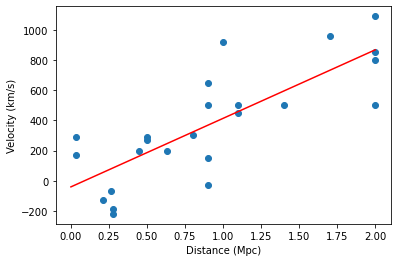

In [6]:
plt.scatter(distances, velocities)

x_vals = np.linspace(0, 2)
fitline = a + b * x_vals
plt.plot(x_vals, fitline, '-r')
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.show()

We can see here that this fit seems appropriate. The units are a little difficult to work with, so the uncertainty is a little obfuscated, but visually we can see that this fit follows the desired linear behavior.

### Grouping

The problem also asks that we group the nebulae into 9 groups based on their distances, velocities, and directions. These groups are given as follows, as are their justifications:

| Group 1 | S. Mag., L. Mag. | Similar Names |

| Group 2 | N. G. C. 6822, 598, 221, 224, 3031 | Negative Velocity |

| Group 3 | 5457, 5194, 4449 | Similar Distances and Velocities |

| Group 4 | 4736, 4214 | Similar Direction, Distances, and Velocities |

| Group 5 | 3627, 4836, 5236 | Same Distance |

| Group 6 | 1068 | Not Similar to any Other Group |

| Group 7 | 5055, 7331 | Same Distance |

| Group 8 | 4258, 4151 | Similar Direction |

| Group 9 | 4382, 4472, 4486, 4649 | Same Distance and Similar Direction |

We then take the average of the distances and velocities for these groups, and then do a fit on these averages.

In [7]:
# Similar Names Group 1: S. Mag., L. Mag.
group1_distance = np.average([0.032, 0.034])
group1_velocity = np.average([170, 290])

# Negative Velocity Group 2: N. G. C. 6822, 598, 221, 224, 3031
group2_distance = np.average([0.214, 0.263, 0.275, 0.275, 0.9])
group2_velocity = np.average([-130, -70, -185, -220, -30])

# Similar Distances and Velocities Group 3: 5457, 5194, 4449
group3_distance = np.average([0.45, 0.5, 0.63])
group3_velocity = np.average([200, 270, 200])

# Similar Direction, Distances, and Velocities Group 4: 4736, 4214
group4_distance = np.average([0.5, 0.8])
group4_velocity = np.average([290, 300])

# Same Distance Group 5: 3627, 4836, 5236
group5_distance = np.average([0.9, 0.9, 0.9])
group5_velocity = np.average([650, 150, 500])

# Not Similar to any Others Group 6: 1068
group6_distance = np.average([1])
group6_velocity = np.average([920])

# Same Distance Group 7: 5055, 7331
group7_distance = np.average([1.1, 1.1])
group7_velocity = np.average([450, 500])

# Similar Direction Group 8: 4258, 4151
group8_distance = np.average([1.4, 1.7])
group8_velocity = np.average([500, 960])

# Same Distance and Similar Direction Group 9: 4382, 4472, 4486, 4649
group9_distance = np.average([2, 2, 2, 2])
group9_velocity = np.average([500, 850, 800, 1090])

group_distances = [group1_distance, group2_distance, group3_distance,
                   group4_distance, group5_distance, group6_distance,
                   group7_distance, group8_distance, group9_distance]

group_velocities = [group1_velocity, group2_velocity, group3_velocity,
                    group4_velocity, group5_velocity, group6_velocity,
                    group7_velocity, group8_velocity, group9_velocity]

In [8]:
compute2 = computeSigma(group_distances, group_velocities)
sigma22 = compute2[0]
a2 = compute2[1]
b2 = compute2[2]
print(a2, b2, sigma22)

55.997271596456464 427.95122065281544 109634.03245955081


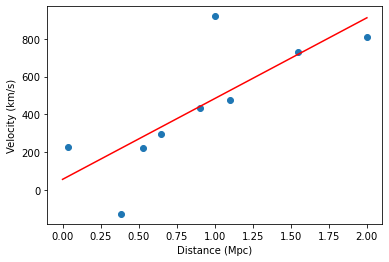

In [9]:
plt.scatter(group_distances, group_velocities)

x_vals2 = np.linspace(0, 2)
fitline2 = a2 + b2 * x_vals2
plt.plot(x_vals2, fitline2, '-r')
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.show()

### Determining the Age of the Universe

Using Hubble's law: $v = H_0 * d$, we know that the slope of this line should be the Hubble constant, $H_0$. Taking the inverse of this should then give the age of the universe. Beginning with the whole plot:

$H_0 = 454.16 \implies \frac{1}{H_0} = 1.472 \times 10^{17} s$ which is about 4.6 billion years. This is quite a bit younger than the accepted value, so either I used the wrong data or the fit does not work as intended. The fit looks good on the plot, so I am thinking that I may have inadvertently used the wrong data, but fit it correctly. 

Either way, we can also find the time given by the grouped values: $H_0 = 427.95 \implies \frac{1}{H_0} = 1.387 \times 10^{17} s$ which is about 4.4 billion years. Again, the fit looks good on the plot, but there is a serious discrepancy between this and the accepted value of about 14 billion years.